## NLP with DL (Standart)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df0 = pd.read_csv('hepsiburada.csv')
df =df0.copy()

In [70]:
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


In [71]:
df["Rating"].value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

## Tokenization

In [72]:
X = df['Review'].values
y = df['Rating'].values

In [73]:
X

array(['3 yıldır tık demedi. :)', '3 yıldır kullanıyorum müthiş ',
       'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
       ..., 'Hızlı Kargo, güzel ürün',
       'telefon başarılı hızlı bir cihaz  sadece beyaz istemiştik gri rengi geldi',
       'Urun cok guzel pazar gunu siparis verdim adanadan sali gunu ulasti gold dengini aldim isinma donma kasma yok orjinal kapali kutusunda geldi surekli telefon degistiren biriyim sikildikca satan biriyim urun guzel fiyat iyi kargo sorunsuz beklemeden bi tusla ayaginiza gelsin fazla 

In [74]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890') #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
#     num_words=None,
#     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [84]:
df.shape

(243497, 2)

In [85]:
tokenizer.fit_on_texts(X)

## Creating word index

In [86]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 'kargo': 26,
 'fiyat': 27,
 'elime': 28,
 'kadar': 29,
 'ile': 30,
 'göre': 31,
 'geldi': 32,
 'var': 33,
 'hepsiburada': 34,
 'ben': 35,
 'gerçekten': 36,
 'fiyata': 37,
 'gün': 38,
 'sonra': 39,
 'cok': 40,
 'kesinlikle': 41,
 'telefon': 42,
 'biraz': 43,
 'hiç': 44,
 'ulaştı': 45,
 'memnun': 46,
 'hem': 47,
 'değil': 48,
 'kullanışlı': 49,
 'mükemmel': 50,
 'oldu': 51,
 'kullanıyorum': 52,
 'önce': 53,
 'sipariş': 54,
 'tek': 55,
 'her': 56,
 'bence': 57,
 'harika': 58,
 'kalitesi': 59,
 'bi': 60,
 'ayrıca': 61,
 'teşekkür': 62,
 'fiyatı': 63,
 'olması': 64,
 'ne': 65,
 'herkese': 66,
 'bile': 67,
 'uzun': 68,
 'süper': 69,
 'tam': 70,
 'zaten': 71,
 'fazla': 72,

In [88]:
len(tokenizer.word_index)

211526

In [145]:
words = pd.DataFrame.from_dict(tokenizer.word_index, orient="index").reset_index()
words.columns = ['words', 'drop']

In [146]:
words = words.drop('drop', axis=1)

In [139]:
words.value_counts()

words       
'               1
proglide        1
progainerla     1
progainerı      1
progainerıda    1
               ..
girdiğim        1
girdiğimde      1
girdiğimi       1
girdiğimin      1
şşmdi           1
Length: 211525, dtype: int64

In [140]:
words.iloc[0:11]

,words
1,bir
2,ve
3,ürün
4,bu
5,iyi
6,güzel
7,için
8,tavsiye
9,ederim
10,daha


In [141]:
words.iloc[14990:15001]

,words
14991,teknolojisine
14992,yaşamama
14993,yakınım
14994,eşine
14995,dambıl
14996,yakınlarıma
14997,çevirme
14998,askeri
14999,dusuyor
15000,dolaşmaya


## Converting tokens to numeric

In [67]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [68]:
X_num_tokens

[[52, 462, 1617, 4510],
 [52, 462, 55, 584],
 [4,
  234,
  29,
  150,
  1,
  76,
  3717,
  1698,
  274,
  82,
  4689,
  10517,
  77,
  187,
  295,
  2020,
  8,
  262,
  5957,
  433,
  1,
  7,
  280,
  1041,
  8857,
  11,
  648,
  78,
  1221,
  225,
  23,
  5,
  1763,
  1,
  1568,
  64,
  68,
  1,
  6,
  5,
  1754,
  893,
  127,
  288,
  1348,
  119,
  20,
  3684,
  5028,
  31,
  172,
  4077,
  4859,
  1930,
  9977,
  25,
  8329,
  3,
  5,
  9977,
  57,
  1696,
  174,
  595,
  16,
  1816],
 [343, 253, 97, 11641, 33, 2623, 55],
 [494, 1, 1, 6, 1350, 53],
 [14, 7],
 [1, 24, 2, 4, 3, 67, 13, 22, 72, 3480, 917, 17, 3, 1, 81],
 [164, 65, 1049, 55, 2075, 13779, 149, 6989, 4510, 65, 339, 11, 1855, 99, 178],
 [4,
  494,
  208,
  8,
  1,
  22,
  771,
  330,
  38,
  186,
  262,
  18,
  367,
  1863,
  3,
  494,
  208,
  8,
  995,
  587,
  651,
  176,
  1147,
  11148,
  65,
  184,
  164,
  250,
  85,
  389,
  26,
  192,
  1856,
  262,
  884,
  34],
 [19,
  2,
  921,
  7547,
  4954,
  160,
  23,
  5

In [69]:
len(X_num_tokens)

243497

In [110]:
X_num_tokens[105]

[1816,
 5360,
 131,
 23,
 1,
 1849,
 74,
 12,
 118,
 1533,
 297,
 745,
 3216,
 13402,
 6326,
 5030,
 2463,
 113,
 2534,
 8858,
 4,
 143]

In [111]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [112]:
print(X_num_tokens[105])

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [116]:
len(X_num_tokens[105])

22

In [117]:
len(X_num_tokens[105])

22

In [125]:
words.isin(['Logitech']).value_counts()

words
False    211526
dtype: int64

In [131]:
words.iloc[5361]

words    aldi
Name: 5361, dtype: object

In [28]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens

[4,
 4,
 66,
 7,
 6,
 2,
 15,
 15,
 36,
 28,
 28,
 8,
 8,
 6,
 8,
 13,
 2,
 19,
 15,
 20,
 21,
 2,
 8,
 37,
 16,
 10,
 25,
 95,
 35,
 51,
 5,
 8,
 15,
 7,
 15,
 13,
 7,
 43,
 9,
 5,
 6,
 11,
 5,
 29,
 6,
 9,
 29,
 9,
 48,
 5,
 5,
 13,
 5,
 9,
 9,
 9,
 21,
 16,
 11,
 7,
 14,
 7,
 32,
 6,
 14,
 6,
 9,
 11,
 8,
 7,
 10,
 10,
 34,
 11,
 12,
 5,
 21,
 14,
 17,
 11,
 9,
 5,
 13,
 20,
 24,
 16,
 16,
 29,
 15,
 6,
 51,
 7,
 5,
 21,
 15,
 15,
 12,
 24,
 5,
 42,
 6,
 11,
 10,
 37,
 5,
 22,
 18,
 6,
 15,
 16,
 6,
 42,
 5,
 27,
 12,
 9,
 7,
 5,
 18,
 8,
 8,
 5,
 16,
 13,
 23,
 10,
 5,
 4,
 5,
 7,
 16,
 28,
 70,
 27,
 23,
 6,
 5,
 31,
 18,
 13,
 9,
 14,
 24,
 17,
 9,
 6,
 30,
 8,
 11,
 5,
 38,
 23,
 35,
 19,
 17,
 13,
 11,
 11,
 19,
 8,
 8,
 20,
 21,
 10,
 14,
 40,
 15,
 8,
 5,
 37,
 8,
 61,
 8,
 18,
 9,
 5,
 19,
 17,
 15,
 4,
 17,
 17,
 27,
 26,
 14,
 6,
 5,
 9,
 5,
 16,
 19,
 10,
 8,
 15,
 11,
 16,
 18,
 6,
 6,
 11,
 10,
 5,
 28,
 10,
 7,
 7,
 18,
 37,
 26,
 34,
 20,
 56,
 29,
 25,
 19,
 45,
 24,

In [29]:
len(num_tokens)

243497

In [30]:
num_tokens = np.array(num_tokens)
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

## Maximum number of tokens for all documents

In [31]:
num_tokens.mean()

21.36101060793357

In [33]:
num_tokens.max()

298

In [34]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [35]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [41]:
max_tokens = 61

In [42]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9598968365113328

## Fixing token counts of all documents (pad_sequences)

In [43]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [47]:
X_pad.shape

(243497, 61)

In [48]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [49]:
X_pad[21941].shape

(61,)

In [51]:
X_pad[21941]

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879])

## Converting numeric tokens to string

In [52]:
index = tokenizer.word_index
inverse_map = dict(zip(index.values(), index.keys()))
inverse_map

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'iyi',
 7: 'güzel',
 8: 'için',
 9: 'tavsiye',
 10: 'ederim',
 11: 'daha',
 12: 'ama',
 13: 'da',
 14: 'gayet',
 15: 'hızlı',
 16: 'teşekkürler',
 17: 'aldım',
 18: 'de',
 19: 'ürünü',
 20: 'gibi',
 21: 'yok',
 22: 'uygun',
 23: 'olarak',
 24: 'kaliteli',
 25: 'en',
 26: '2',
 27: 'kargo',
 28: 'fiyat',
 29: 'elime',
 30: 'kadar',
 31: 'ile',
 32: 'göre',
 33: 'geldi',
 34: 'var',
 35: 'hepsiburada',
 36: 'ben',
 37: 'gerçekten',
 38: '1',
 39: 'fiyata',
 40: 'gün',
 41: 'sonra',
 42: 'cok',
 43: 'kesinlikle',
 44: 'telefon',
 45: 'biraz',
 46: 'hiç',
 47: 'ulaştı',
 48: 'memnun',
 49: 'hem',
 50: 'değil',
 51: 'kullanışlı',
 52: '3',
 53: 'mükemmel',
 54: 'oldu',
 55: 'kullanıyorum',
 56: 'önce',
 57: 'sipariş',
 58: 'tek',
 59: 'her',
 60: 'bence',
 61: 'harika',
 62: 'kalitesi',
 63: 'bi',
 64: 'ayrıca',
 65: '5',
 66: 'teşekkür',
 67: 'fiyatı',
 68: 'olması',
 69: 'ne',
 70: 'herkese',
 71: 'bile',
 72: 'uzun',
 73: 'süper',

In [59]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [60]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [63]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [64]:
tokens_to_string(X_num_tokens[21941])

'özellikle bu kısma yazıyorum iyice cihazın hızı çok iyi isınma normal boyutlarda kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net görüntülü konuşma özelliği yok ancak uygulama ile olur anten çekimi gayet iyi parmak izi okuyucusu gayet hızlı bazen tuşu istiyor ve vs ön kamera da tatmin edici çekim esnasında ekran beyaz ışık vererek flaş görevi görür batarya bana 1 hafta gidiyor sık kullanımda ise 2 3 gün gidiyor hızlı şarj 1 saatte doluyor şekilleri ele oturuyor ve şık bir görüntü var telefonu aldığım gün gittim ve ilk yerden ekran koruyucu ve kılıf buldum kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi ekrana bakarken açık kalma özelliği yok diğer akıllı cihaz özellikleri 90 ı bu cihazda mevcut güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor 4gb ram var genelde yarısı boş kalıyor bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor bu cihaz da içine dahil bu cihazlar güncelleme almaz ve rom benim için güncelleme sorun olmaz 

## Train Set Split

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=101)

## Modelling

In [73]:
model = Sequential()

In [72]:
embedding_size = 100

In [74]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [36]:
# pip install -U numpy==1.19.5

In [75]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [77]:
optimizer = Adam(learning_rate=0.004)

In [82]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [83]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 61, 100)           1500000   
_________________________________________________________________
gru (GRU)                    (None, 61, 48)            21600     
_________________________________________________________________
gru_1 (GRU)                  (None, 61, 24)            5328      
_________________________________________________________________
gru_2 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 1,528,309
Trainable params: 1,528,309
Non-trainable params: 0
_________________________________________________________________


In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", 
                           mode="auto", 
                           verbose=1,
                           patience = 5, 
                           restore_best_weights=True)

In [88]:
pd.Series(y_train).value_counts(normalize=True)

1    0.943834
0    0.056166
dtype: float64

In [89]:
weights = {0:95, 1:5}

In [91]:
model.fit(X_train, y_train, epochs=1, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

761/761 [==============================] - 308s 404ms/step - loss: 1.7015 - recall: 0.9332 - val_loss: 0.2616 - val_recall: 0.9035


## Model evaluation

In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,1.701493,0.933247,0.261575,0.90347


<AxesSubplot:>

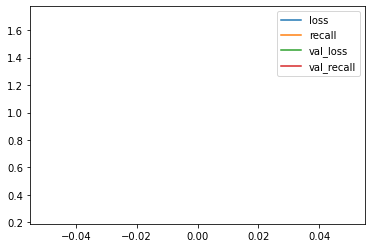

In [93]:
model_loss.plot()

In [94]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 257s 42ms/step - loss: 0.1939 - recall: 0.9218


[0.19389069080352783, 0.9218301177024841]

In [95]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 63s 42ms/step - loss: 0.2616 - recall: 0.9035


[0.2615748345851898, 0.9034700393676758]

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 10833    108]
 [ 14372 169484]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.99      0.60     10941
           1       1.00      0.92      0.96    183856

    accuracy                           0.93    194797
   macro avg       0.71      0.96      0.78    194797
weighted avg       0.97      0.93      0.94    194797



In [97]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 2414   321]
 [ 4437 41528]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.88      0.50      2735
           1       0.99      0.90      0.95     45965

    accuracy                           0.90     48700
   macro avg       0.67      0.89      0.72     48700
weighted avg       0.96      0.90      0.92     48700



In [98]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [99]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [53]:
y_pred2 = np.array([i[0] for i in y_pred])
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
incorrect = np.where(y_test != y_pred2)
incorrect

(array([   26,    49,    52, ..., 48625, 48678, 48688], dtype=int64),)

In [55]:
incorrect = incorrect[0]
incorrect

array([   26,    49,    52, ..., 48625, 48678, 48688], dtype=int64)

In [56]:
len(incorrect)

2432

In [57]:
idx = incorrect[0]
idx

26

In [58]:
text = X_test[idx]
text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   45,
       1797,   12,  530,    3, 9447,  367])

In [59]:
tokens_to_string(text)

'biraz gürültülü ama temiz ve kupkuru çıkıyor'

In [60]:
y_pred[idx]

array([0])

In [61]:
y_test[idx]

1

In [62]:
y_pr = model.predict(X_test)

In [63]:
y_pr[idx]

array([0.25576508], dtype=float32)

## Predicton

In [64]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [65]:
tokens = tokenizer.texts_to_sequences(reviews)

In [66]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [67]:
model.predict(tokens_pad)

array([[0.99372387],
       [0.8375423 ],
       [0.00367144],
       [0.9755682 ],
       [0.03243351],
       [0.00392675],
       [0.9500576 ],
       [0.03713459],
       [0.9882798 ],
       [0.00779113],
       [0.9907751 ],
       [0.66592026],
       [0.00306067],
       [0.9699082 ]], dtype=float32)